# **EXERCISE NOTEBOOK**

This simple notebook serves as exercise run-through for doing ML Project.

In this notebook we will try to create a model which is going to predict the salary in rupees of data related job. The data used in this notebook can be accessed in [link]('https://www.kaggle.com/datasets/whenamancodes/data-science-fields-salary-categorization')

## **IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings(action='ignore')

## **DATA LOADING AND OVERVIEW**

In [3]:
df = pd.read_csv('Data_Science_Fields_Salary_Categorization.csv').drop(columns='Unnamed: 0')
df.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


In [4]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          607 non-null    int64 
 1   Designation           607 non-null    object
 2   Experience            607 non-null    object
 3   Employment_Status     607 non-null    object
 4   Salary_In_Rupees      607 non-null    object
 5   Employee_Location     607 non-null    object
 6   Company_Location      607 non-null    object
 7   Company_Size          607 non-null    object
 8   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


looks like there is no missing value in our data

In [5]:
df[df.duplicated()].shape

(42, 9)

There are 42 entries duplicated data. we will remove it later in cleaning section.

In [6]:
df.isnull().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Salary_In_Rupees        0
Employee_Location       0
Company_Location        0
Company_Size            0
Remote_Working_Ratio    0
dtype: int64

Just in case, there is no missing value.

In [7]:
num_col = df.describe().columns.tolist()
cat_col = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
# numeric overview
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Working_Year,607.0,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
Remote_Working_Ratio,607.0,70.922570,40.709130,0.0,50.0,100.0,100.0,100.0


In [9]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

Designation

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data               

Based on general overview:
- there is high cardinality in columns: ....
- `salary` data type is `object`, we need to clean the `,` in  order to convert it into integer
- there is no missing value on data
- there are duplicated entries which we will clean in next section
- working year only consist between 2020 and 2022


## **DATA CLEANING**

In [10]:
# dataframe used in this section saved on df_clean variable
df_clean = df.copy()
df_clean.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


**remove duplicated data**

In [11]:
# shape of dataframe before remove duplicates
df_clean[df_clean.duplicated()].shape

(42, 9)

In [12]:
df_clean.drop_duplicates(inplace=True)

# shape of dataframe after remove duplicates
df_clean[df_clean.duplicated()].shape

(0, 9)

**converting the type of `Salary_In_Rupees` column**

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          565 non-null    int64 
 1   Designation           565 non-null    object
 2   Experience            565 non-null    object
 3   Employment_Status     565 non-null    object
 4   Salary_In_Rupees      565 non-null    object
 5   Employee_Location     565 non-null    object
 6   Company_Location      565 non-null    object
 7   Company_Size          565 non-null    object
 8   Remote_Working_Ratio  565 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 44.1+ KB


In [14]:
df_clean['Salary_In_Rupees'] = df_clean['Salary_In_Rupees'].replace(to_replace={',':'', '.00':''}, regex=True)
df_clean = df_clean.astype({"Salary_In_Rupees": int, "Working_Year": int})
df_clean['Salary_In_Rupees']

0       6352272
1      20688070
2       8674985
3       1591390
4      11935425
         ...   
602    12253703
603       25757
604    10264466
605    11935425
606       15913
Name: Salary_In_Rupees, Length: 565, dtype: int32

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          565 non-null    int32 
 1   Designation           565 non-null    object
 2   Experience            565 non-null    object
 3   Employment_Status     565 non-null    object
 4   Salary_In_Rupees      565 non-null    int32 
 5   Employee_Location     565 non-null    object
 6   Company_Location      565 non-null    object
 7   Company_Size          565 non-null    object
 8   Remote_Working_Ratio  565 non-null    int64 
dtypes: int32(2), int64(1), object(6)
memory usage: 39.7+ KB


## **EDA for Analysis Purpose**

**Salary based Experience**

<AxesSubplot:xlabel='Experience'>

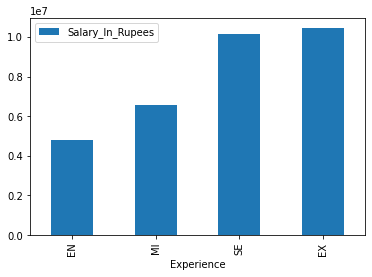

In [16]:
df_clean.groupby('Experience')[['Salary_In_Rupees']].mean().sort_values('Salary_In_Rupees').plot(kind='bar')

<AxesSubplot:xlabel='Experience', ylabel='Salary_In_Rupees'>

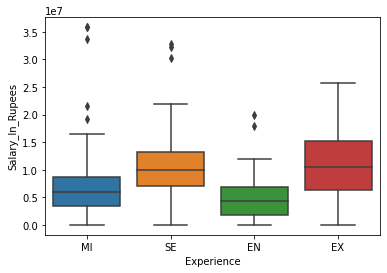

In [17]:
sns.boxplot(data=df_clean, x='Experience', y='Salary_In_Rupees')

**Salary based Employee Location**

<AxesSubplot:xlabel='Employee_Location'>

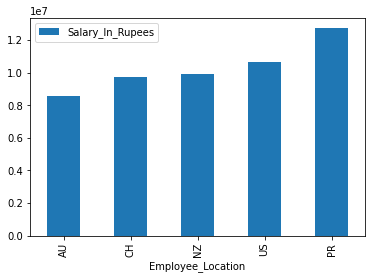

In [18]:
df_clean.groupby('Employee_Location')[['Salary_In_Rupees']].mean().sort_values('Salary_In_Rupees').tail().plot(kind='bar')

**split data into train and test**

In [19]:
df_clean

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,6352272,DE,DE,L,0
1,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,S,0
2,2020,Big Data Engineer,SE,FT,8674985,GB,GB,M,50
3,2020,Product Data Analyst,MI,FT,1591390,HN,HN,S,0
4,2020,Machine Learning Engineer,SE,FT,11935425,US,US,L,50
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,SE,FT,12253703,US,US,M,100
603,2022,Data Engineer,SE,FT,25757,US,US,M,100
604,2022,Data Analyst,SE,FT,10264466,US,US,M,0
605,2022,Data Analyst,SE,FT,11935425,US,US,M,100


In [20]:
# define feature and target
X = df_clean.drop('Salary_In_Rupees', axis=1)
y = df_clean['Salary_In_Rupees']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(395, 8)
(170, 8)
(395,)
(170,)


In [22]:
# for EDA model creation we will use dataframe stored in df_eda
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(395, 9)

## **EDA FOR MODELING**

In [23]:
df_eda.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_Rupees
301,2022,Data Scientist,SE,FT,GB,GB,M,0,8331086
56,2020,Data Scientist,MI,FT,ES,ES,M,100,3085387
144,2021,Data Engineer,MI,FT,US,US,L,100,7956950
60,2020,Data Engineer,MI,FT,US,US,L,100,8752645
6,2020,Lead Data Scientist,SE,FT,US,US,S,100,15118205


In [24]:
# get name columns for data type numeric and categoric
num_col = df_eda.select_dtypes(exclude=['object']).columns.tolist()
cat_col = df_eda.select_dtypes(include=['object']).columns.tolist()

### **numerical feature**

In [25]:
df_eda[num_col].head()

,Working_Year,Remote_Working_Ratio,Salary_In_Rupees
301,2022,0,8331086
56,2020,100,3085387
144,2021,100,7956950
60,2020,100,8752645
6,2020,100,15118205


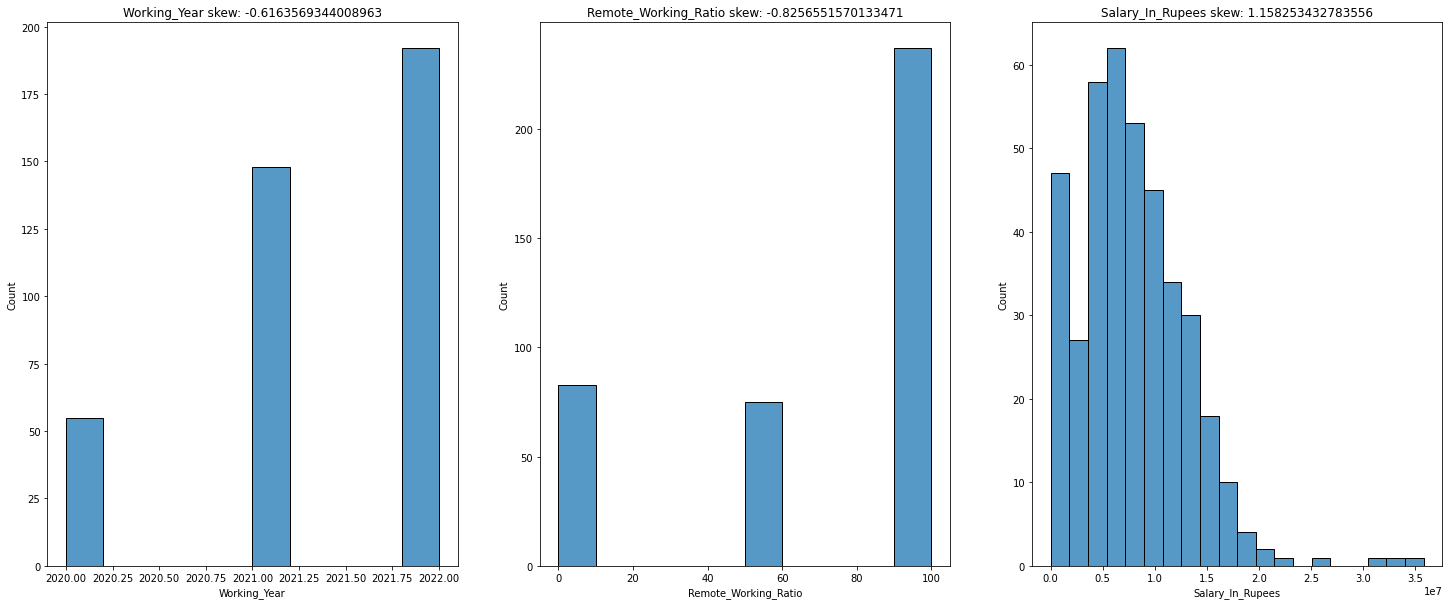

In [26]:
cols_name = ['Working_Year', 'Remote_Working_Ratio', 'Salary_In_Rupees']

fig, ax = plt.subplots(ncols=3, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'{cols_name[idx]} skew: {df_eda[col].skew()}')

`Salary_In_Rupees` is target variable, so we will leave it as it is for now

### **outlier handling in `Remote_Working_Ratio`**

let's assume that remote working ratio is numerical column, since we do not have the "approriate" one in our dataset. It will serve as example purpose only, we are not going to include this process into our model.

In [27]:
df_eda['Remote_Working_Ratio'].skew()

-0.8256551570133471

Skewness value is -0.8, so we are going to use IQR method to handle the outlier in `Remote_Working_Ratio`

In [28]:
# outlier detection using IQR 
Q3 = df_eda['Remote_Working_Ratio'].quantile(.75)
Q1 = df_eda['Remote_Working_Ratio'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['Remote_Working_Ratio'] > upper) | (df_eda['Remote_Working_Ratio'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


In [29]:
# drop outlier if exist, and small proportion
df_eda_cleaned = df_eda[(df_eda['Remote_Working_Ratio'] <= upper) & (df_eda['Remote_Working_Ratio'] >= lower)]
df_eda_cleaned.shape

(395, 9)

In [30]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['Remote_Working_Ratio'])

df_eda_cleaned = wins.fit_transform(df_eda)

In [31]:
# Compare before and after outlier handling
print('before handling: \n', df_eda[num_col].describe())

print('after handling: \n', df_eda_cleaned[num_col].describe())

before handling: 
        Working_Year  Remote_Working_Ratio  Salary_In_Rupees
count    395.000000            395.000000      3.950000e+02
mean    2021.346835             69.493671      7.921653e+06
std        0.711550             40.613904      5.233120e+06
min     2020.000000              0.000000      2.686000e+03
25%     2021.000000             50.000000      4.335742e+06
50%     2021.000000            100.000000      7.240825e+06
75%     2022.000000            100.000000      1.100446e+07
max     2022.000000            100.000000      3.580628e+07
after handling: 
        Working_Year  Remote_Working_Ratio  Salary_In_Rupees
count    395.000000            395.000000      3.950000e+02
mean    2021.346835             69.493671      7.921653e+06
std        0.711550             40.613904      5.233120e+06
min     2020.000000              0.000000      2.686000e+03
25%     2021.000000             50.000000      4.335742e+06
50%     2021.000000            100.000000      7.240825e+06
75%

there is no difference between before and after because based on IQR method detection, no data point detected as outlier.

but hopefully based on this process we can get outlook how the process can be done.

#### **categorical features**

Remember that, our last numerical handling process was saved in `df_eda_cleaned` so we will continue with that variable df.

Here we need to add `Salary_In_Rupees` column as target. 

In [32]:
# save in df_cat process as temporary variable
df_cat = df_eda_cleaned[cat_col + ['Salary_In_Rupees']]

df_cat.head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Salary_In_Rupees
301,Data Scientist,SE,FT,GB,GB,M,8331086
56,Data Scientist,MI,FT,ES,ES,M,3085387
144,Data Engineer,MI,FT,US,US,L,7956950
60,Data Engineer,MI,FT,US,US,L,8752645
6,Lead Data Scientist,SE,FT,US,US,S,15118205


In [33]:
for i in df_cat.columns.tolist():
    print(f'num of unique label in {i}: ', len(df_cat[i].unique()))

num of unique label in Designation:  46
num of unique label in Experience:  4
num of unique label in Employment_Status:  4
num of unique label in Employee_Location:  48
num of unique label in Company_Location:  43
num of unique label in Company_Size:  3
num of unique label in Salary_In_Rupees:  286


Columns `Designation`, `Employee_Location`, and `Company_Location` have more than 40 unique labels, or high cardinality. If possible we could simplify these features into its more general group.

example:
Create new column `Employee_Continent` and `Company_Continent` that will translate location country into location continent.

```python
# example, creating column `employee_continent`
employee_continent = []

for idx, loc in df_cat['Employee_Location']:
    if loc in ['US', 'UK', 'FR']:
        employee_continent.append('Europe')
    elif loc in ['IN', 'CH', 'ID']:
        employee_continent.append('Asia')
    elif .....
        .....

df_cat['Employee_Continent'] = employee_continent
```

with that handling process, we can minimize/transform unique labels from 48 into 5 unique labels

In [34]:
for i in df_cat.columns.tolist():
    print(i, '\n')
    print(df_cat[i].value_counts().head())
    print('-'*30)

Designation 

Data Engineer                88
Data Scientist               82
Data Analyst                 56
Machine Learning Engineer    31
Research Scientist           13
Name: Designation, dtype: int64
------------------------------
Experience 

SE    160
MI    155
EN     61
EX     19
Name: Experience, dtype: int64
------------------------------
Employment_Status 

FT    387
PT      6
FL      1
CT      1
Name: Employment_Status, dtype: int64
------------------------------
Employee_Location 

US    198
GB     31
IN     22
DE     20
CA     18
Name: Employee_Location, dtype: int64
------------------------------
Company_Location 

US    212
GB     31
DE     21
CA     20
IN     18
Name: Company_Location, dtype: int64
------------------------------
Company_Size 

M    205
L    140
S     50
Name: Company_Size, dtype: int64
------------------------------
Salary_In_Rupees 

7956950     8
9548340     8
11935425    7
6365560     6
10741883    6
Name: Salary_In_Rupees, dtype: int64
-----------

Let's take some notes for each categorical features:
- `Designation`: This feature has 46 unique labels, but but after further examination based `.value_counts()` only 5 label that dominate the distribution, which `Data Engineer`, `Data Scientist`, `Data Analyst`, `MLE`, and `RS`. Other than that have <10 occurence. We will transform the label excluding those 5 as `Others`
- `Experience`: Based on documentation in data source, label in `Experience` feature act as ordinal variable.
```markdown
The experience level in the job during the year. [ EN - Entry level / Junior, MI - Mid level / Intermediate, SE - Senior level / Expert, EX - Executive level / Director ]
```
- `Employment_status`: has 4 unique labels. Since there are huge gap between each label, we will transform `FL` AND `CT` into `PT`.
- `Employee_Location` and `Company_Location`: for these 2 features, we will take 5 most frequent labels and transform other lables as `Others`.
- `Company_Size`: will be treated as ordinal data with ranking `S`, `M`, and `L`

**FE: Designation**


In [35]:
retain_label = df_cat['Designation'].value_counts().head().index.tolist().copy()
retain_label

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Research Scientist']

In [36]:
designation_manipulated = []

for i in df_cat['Designation']:
    if i in retain_label:
        designation_manipulated.append(i)
    else:
        designation_manipulated.append('Others')

df_cat['Designation_2'] = designation_manipulated.copy()
df_cat.sample(10)

,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Salary_In_Rupees,Designation_2
387,Data Analyst,SE,FT,US,US,M,13049398,Data Analyst
501,Head of Data,MI,FT,EE,EE,S,2623725,Others
533,Machine Learning Engineer,SE,FT,US,US,M,15325086,Machine Learning Engineer
282,Data Engineer,MI,PT,NL,NL,L,5549256,Data Engineer
63,Data Scientist,SE,FT,US,US,L,32782634,Data Scientist
316,Data Engineer,EN,FT,GB,GB,M,3644840,Data Engineer
176,Data Scientist,MI,FT,MX,MX,S,227489,Data Scientist
543,Data Engineer,MI,FT,US,US,M,7885337,Data Engineer
313,Data Engineer,MI,FT,GB,GB,M,6248275,Data Engineer
338,Data Analyst,SE,FT,US,US,M,10869194,Data Analyst


**FE: Employment_Status**

In [37]:
df_cat['Employment_Status'].value_counts()

FT    387
PT      6
FL      1
CT      1
Name: Employment_Status, dtype: int64

In [38]:
df_cat['Employment_Status'] = df_cat['Employment_Status'].replace({'FL':'PT', 'CT':'PT'})

df_cat['Employment_Status'].value_counts()

FT    387
PT      8
Name: Employment_Status, dtype: int64

**FE: Employee Location**

In [39]:
retain_emp_loc = df_cat['Employee_Location'].value_counts().head().index.tolist().copy()
retain_emp_loc

emp_loc_manipulated = []

for i in df_cat['Employee_Location']:
    if i in retain_emp_loc:
        emp_loc_manipulated.append(i)
    else:
        emp_loc_manipulated.append('Others')

df_cat['emp_loc_2'] = emp_loc_manipulated.copy()

**FE: Company Location**

In [40]:
retain_comp_loc = df_cat['Company_Location'].value_counts().head().index.tolist().copy()
retain_comp_loc

comp_loc_manipulated = []

for i in df_cat['Employee_Location']:
    if i in retain_comp_loc:
        comp_loc_manipulated.append(i)
    else:
        comp_loc_manipulated.append('Others')

df_cat['comp_loc_2'] = comp_loc_manipulated.copy()

In [41]:
df_cat.sample(10)

,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Salary_In_Rupees,Designation_2,emp_loc_2,comp_loc_2
14,Data Analyst,MI,FT,US,US,L,6763408,Data Analyst,US,US
183,Finance Data Analyst,SE,FT,GB,GB,L,4925034,Others,GB,GB
386,Machine Learning Engineer,EN,FT,GB,GB,L,2967942,Machine Learning Engineer,GB,GB
606,AI Scientist,MI,FT,IN,US,L,15913,Others,IN,IN
13,Lead Data Analyst,MI,FT,US,US,L,6922547,Others,US,US
498,Research Scientist,SE,FT,FR,FR,L,7433940,Research Scientist,Others,Others
147,Data Engineer,MI,FT,US,US,L,7161255,Data Engineer,US,US
9,Lead Data Engineer,SE,FT,NZ,NZ,S,9946188,Others,Others,Others
507,Research Scientist,MI,FT,AT,AT,L,5103,Research Scientist,Others,Others
22,Data Engineer,SE,FT,GR,GR,L,3811299,Data Engineer,Others,Others


In [42]:
list_cat = ['Experience', 'Employment_Status', 'Company_Size', 'Designation_2', 'emp_loc_2', 'comp_loc_2']

df_cat[list_cat].head()

,Experience,Employment_Status,Company_Size,Designation_2,emp_loc_2,comp_loc_2
301,SE,FT,M,Data Scientist,GB,GB
56,MI,FT,M,Data Scientist,Others,Others
144,MI,FT,L,Data Engineer,US,US
60,MI,FT,L,Data Engineer,US,US
6,SE,FT,S,Others,US,US


**EDA Visualization for categorical data**

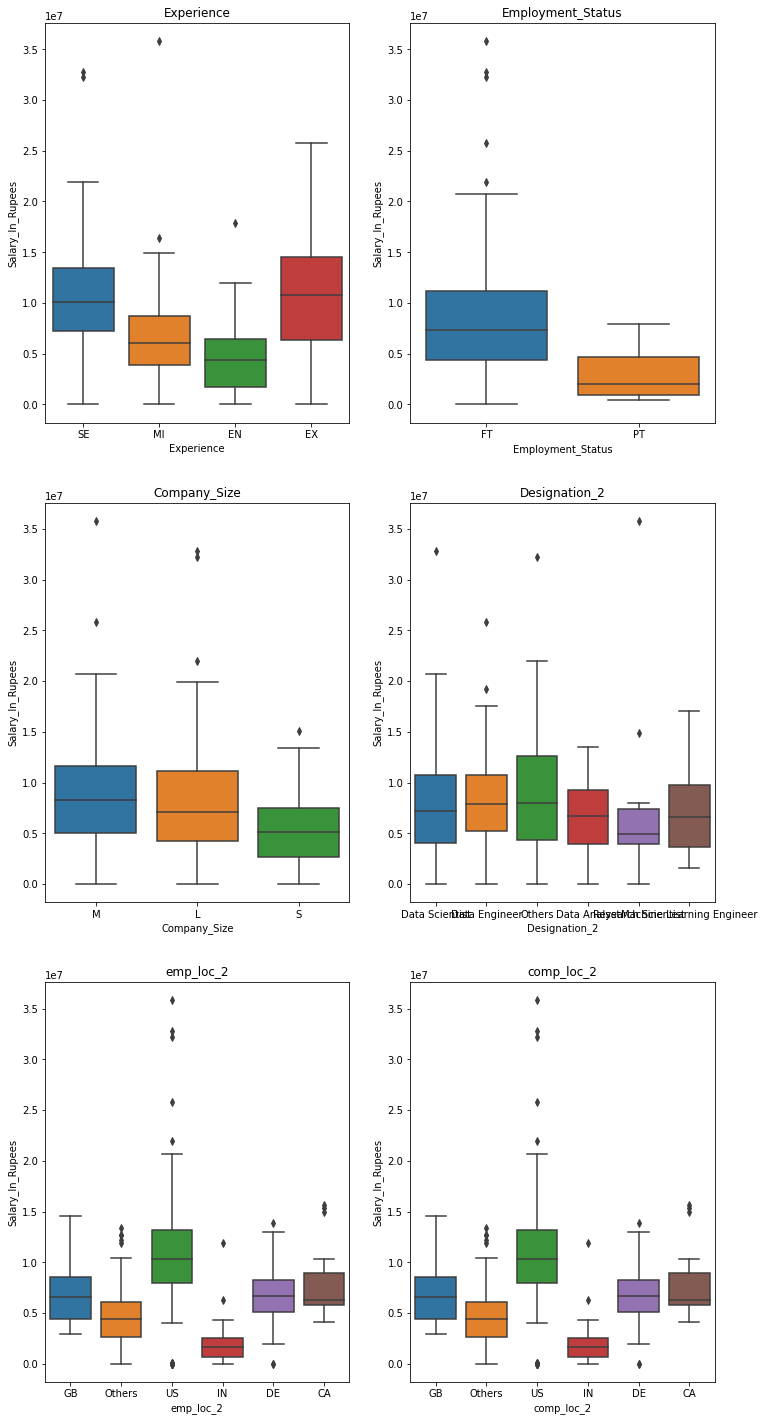

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[12, 25])
ax = ax.flatten()

for idx, col in enumerate(list_cat):
    sns.boxplot(data=df_cat, x=col, y='Salary_In_Rupees', ax=ax[idx])
    ax[idx].set_title(col)


.... Input insight here, it would be better if outlier dropped. ....

In [44]:
Q3 = df_cat[(df_cat['Experience'] == "EN")]['Salary_In_Rupees'].quantile(.75)
Q1 = df_cat[(df_cat['Experience'] == "EN")]['Salary_In_Rupees'].quantile(.25)
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)

df_cat[(df_cat['Experience'] == "EN") & (df_cat['Salary_In_Rupees']>upper)].index.tolist()

[115]

In [45]:
def remove_outlier_label(col, label, num):
    Q3 = df_cat[(df_cat[col] == label)][num].quantile(.75)
    Q1 = df_cat[(df_cat[col] == label)][num].quantile(.25)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    
    return df_cat[(df_cat[col] == label) & (df_cat[num] > upper)].index.tolist()

In [46]:
indx = []
for i in df_cat['Experience'].unique().tolist():
    indx = indx + remove_outlier_label('Experience', i, 'Salary_In_Rupees')

# drop index from categorical df
df_cat.drop(indx, axis=0, inplace=True)

In [47]:
# drop same index from numeric df
df_num = df_eda_cleaned[num_col].drop(indx, axis=0)

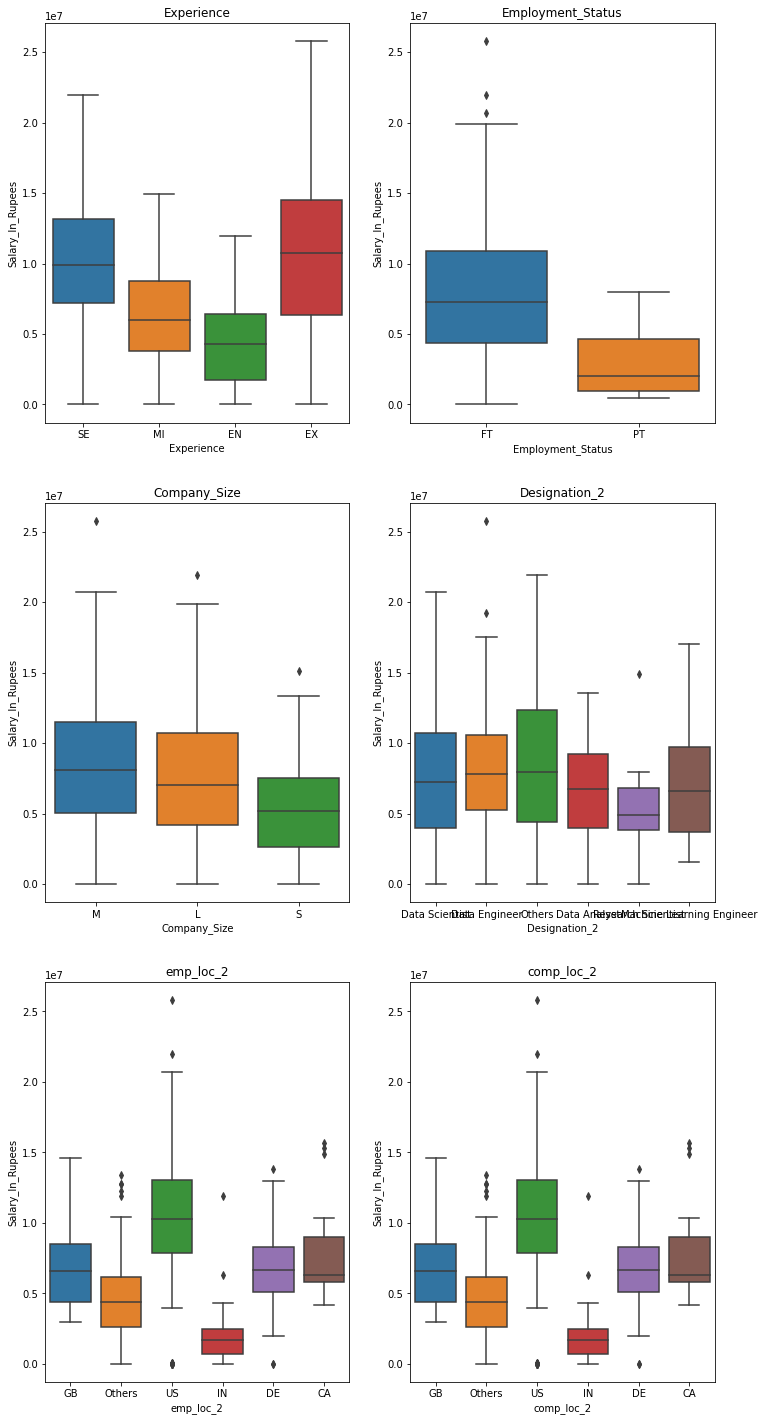

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[12, 25])
ax = ax.flatten()

for idx, col in enumerate(list_cat):
    sns.boxplot(data=df_cat, x=col, y='Salary_In_Rupees', ax=ax[idx])
    ax[idx].set_title(col)


**One Hot Encoding for `Designation`, `Employee_Location` and `Company_Location`**

In [49]:
df_cat[['Designation_2', 'emp_loc_2', 'comp_loc_2']].head(5)

,Designation_2,emp_loc_2,comp_loc_2
301,Data Scientist,GB,GB
56,Data Scientist,Others,Others
144,Data Engineer,US,US
60,Data Engineer,US,US
6,Others,US,US


In [50]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['Designation_2', 'emp_loc_2', 'comp_loc_2']]))
cat_ohe.columns = ohe_enc.get_feature_names(['Designation_2', 'emp_loc_2', 'comp_loc_2'])

review = pd.concat([df_cat[['Designation_2', 'emp_loc_2', 'comp_loc_2']].reset_index(drop=True), cat_ohe], axis=1)
review

,Designation_2,emp_loc_2,comp_loc_2,Designation_2_Data Analyst,Designation_2_Data Engineer,Designation_2_Data Scientist,Designation_2_Machine Learning Engineer,Designation_2_Others,Designation_2_Research Scientist,emp_loc_2_CA,...,emp_loc_2_GB,emp_loc_2_IN,emp_loc_2_Others,emp_loc_2_US,comp_loc_2_CA,comp_loc_2_DE,comp_loc_2_GB,comp_loc_2_IN,comp_loc_2_Others,comp_loc_2_US
0,Data Scientist,GB,GB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Data Scientist,Others,Others,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Data Engineer,US,US,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Data Engineer,US,US,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Others,US,US,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Others,Others,Others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
386,Others,Others,Others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
387,Data Analyst,US,US,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
388,Others,Others,Others,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Ordinal Encoder for `Experience`, `Employment_status` and `Company_Size`**

In [51]:
for i in ['Experience', 'Employment_Status', 'Company_Size']:
    print(df_cat[i].value_counts())
    print('-'*30)

SE    158
MI    153
EN     60
EX     19
Name: Experience, dtype: int64
------------------------------
FT    382
PT      8
Name: Employment_Status, dtype: int64
------------------------------
M    203
L    137
S     50
Name: Company_Size, dtype: int64
------------------------------


In [52]:
exp_cat = ['EN', 'MI', 'SE', 'EX']
empst_cat = ['PT', 'FT']
comp_sz_cat = ['S', 'M', 'L']

ord_enc = OrdinalEncoder(categories=[exp_cat, empst_cat, comp_sz_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['Experience', 'Employment_Status', 'Company_Size']]))

cat_ord.columns = ['Experience', 'Employment_Status', 'Company_Size']
review = pd.concat([df_cat[['Experience', 'Employment_Status', 'Company_Size']].reset_index(drop=True), cat_ord], axis=1)

review

,Experience,Employment_Status,Company_Size,Experience,Employment_Status,Company_Size
0,SE,FT,M,2.0,1.0,1.0
1,MI,FT,M,1.0,1.0,1.0
2,MI,FT,L,1.0,1.0,2.0
3,MI,FT,L,1.0,1.0,2.0
4,SE,FT,S,2.0,1.0,0.0
...,...,...,...,...,...,...
385,EN,FT,L,0.0,1.0,2.0
386,SE,FT,S,2.0,1.0,0.0
387,MI,FT,S,1.0,1.0,0.0
388,MI,FT,S,1.0,1.0,0.0


**combine Numerical and Categorical data after processed**

In [53]:
df_eda_cleaned = pd.concat([df_num.reset_index(drop=True), cat_ohe, cat_ord], axis=1)
df_eda_cleaned.head()

,Working_Year,Remote_Working_Ratio,Salary_In_Rupees,Designation_2_Data Analyst,Designation_2_Data Engineer,Designation_2_Data Scientist,Designation_2_Machine Learning Engineer,Designation_2_Others,Designation_2_Research Scientist,emp_loc_2_CA,...,emp_loc_2_US,comp_loc_2_CA,comp_loc_2_DE,comp_loc_2_GB,comp_loc_2_IN,comp_loc_2_Others,comp_loc_2_US,Experience,Employment_Status,Company_Size
0,2022,0.0,8331086,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
1,2020,100.0,3085387,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,2021,100.0,7956950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
3,2020,100.0,8752645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0
4,2020,100.0,15118205,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0


**Feature Selection Using Heatmap Correlation**

Based on corr .... `Working_Year`, `Remote_Working_Ratio`, `Designation_2_Data Analyst`, `emp_loc_2_IN`, `emp_loc_2_Others`, `emp_loc_2_US`, `comp_loc_2_IN`, `comp_loc_2_Others`, `comp_loc_2_US`, `Experience`, `Employment_Status`, and `Company_Size`

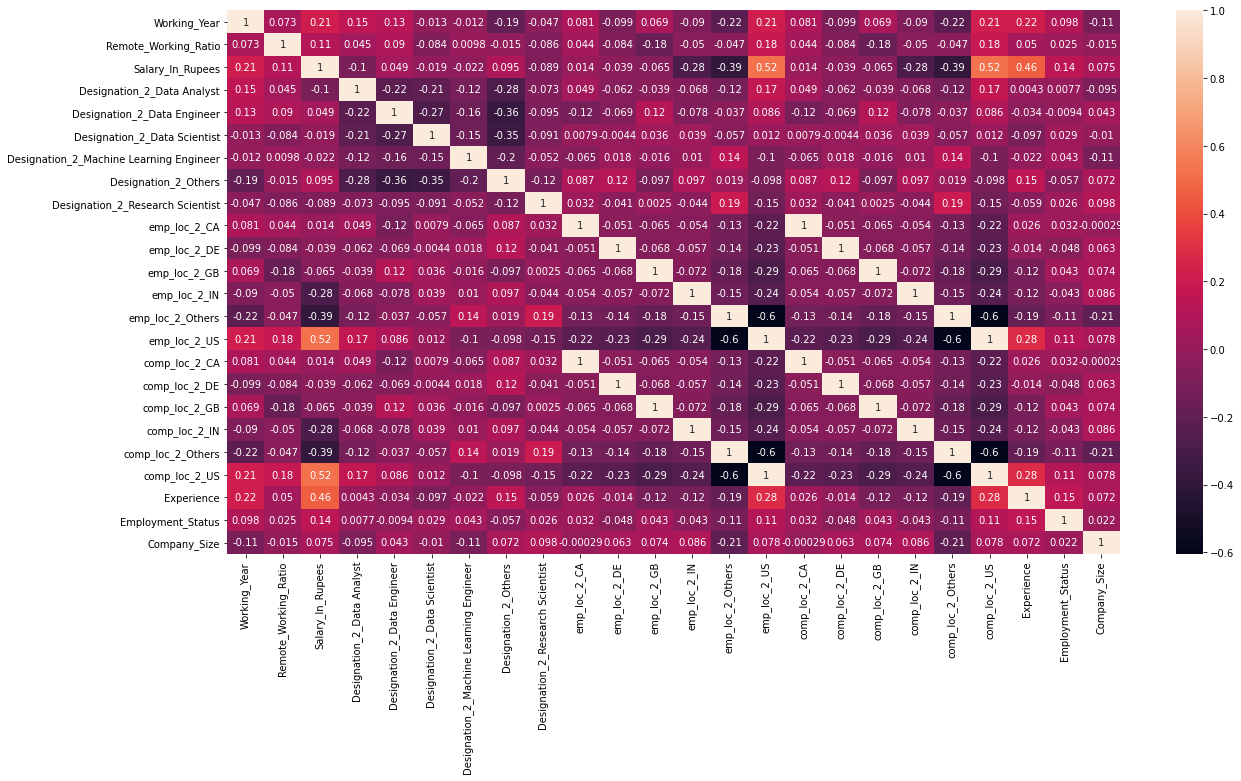

In [54]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_eda_cleaned.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [55]:
df_eda_cleaned[['Working_Year', 'Remote_Working_Ratio', 'Designation_2_Data Analyst',
                'emp_loc_2_IN', 'emp_loc_2_Others', 'emp_loc_2_US', 'comp_loc_2_IN',
                'comp_loc_2_Others', 'comp_loc_2_US', 'Experience', 'Employment_Status', 'Company_Size',
                'Salary_In_Rupees']]

,Working_Year,Remote_Working_Ratio,Designation_2_Data Analyst,emp_loc_2_IN,emp_loc_2_Others,emp_loc_2_US,comp_loc_2_IN,comp_loc_2_Others,comp_loc_2_US,Experience,Employment_Status,Company_Size,Salary_In_Rupees
0,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,8331086
1,2020,100.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3085387
2,2021,100.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,7956950
3,2020,100.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,8752645
4,2020,100.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,15118205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2021,100.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,4702717
386,2020,50.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,9946188
387,2022,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,4615031
388,2021,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1432251


In [56]:
# numerical scaling

num_col = ['Working_Year', 'Remote_Working_Ratio']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_eda_cleaned[num_col]))
num_scaled.columns = num_col

df_eda_cleaned.drop(num_col, axis=1, inplace=True)
df_eda_cleaned = pd.concat([df_eda_cleaned, num_scaled], axis=1)

df_eda_cleaned = df_eda_cleaned[['Working_Year', 'Remote_Working_Ratio', 'Designation_2_Data Analyst',
                'emp_loc_2_IN', 'emp_loc_2_Others', 'emp_loc_2_US', 'comp_loc_2_IN',
                'comp_loc_2_Others', 'comp_loc_2_US', 'Experience', 'Employment_Status', 'Company_Size',
                'Salary_In_Rupees']]

1. Outlier handling in `Remote_Working_Ratio` column
2. Convert unique labels in `Designation`, `Employee_Location`, `Company_Location` into 6 unique labels using 5 most frequent labels + 1 `Others` labels
3. Convert 4 unique labels in `Employment_Status` into 2 unique labels
4. Remove Outlier in `Experience` labels based on `Salary_In_Rupees`
5. Using One Hot Encoding method to `Designation`, `Employee_Location`, and `Company_Location` columns
6. Applied Ordinal Encoder to `Experience`, `Employment_Status`, and `Company_Size` columns 
7. Feature Selection -> `Working_Year`, `Remote_Working_Ratio`, `Designation_2_Data Analyst`, `emp_loc_2_IN`, `emp_loc_2_Others`, `emp_loc_2_US`, `comp_loc_2_IN`, `comp_loc_2_Others`, `comp_loc_2_US`, `Experience`, `Employment_Status`, and `Company_Size`
8. Scaling on numerical features

## **PREPROCESS**

1. Outlier handling in `Remote_Working_Ratio` column
2. Convert unique labels in `Designation`, `Employee_Location`, `Company_Location` into 6 unique labels using 5 most frequent labels + 1 `Others` labels
3. Convert 4 unique labels in `Employment_Status` into 2 unique labels
4. Using One Hot Encoding method to `Designation`, `Employee_Location`, and `Company_Location` columns
5. Applied Ordinal Encoder to `Experience`, `Employment_Status`, and `Company_Size` columns 
6. Feature Selection -> `Working_Year`, `Remote_Working_Ratio`, `Designation_2_Data Analyst`, `emp_loc_2_IN`, `emp_loc_2_Others`, `emp_loc_2_US`, `comp_loc_2_IN`, `comp_loc_2_Others`, `comp_loc_2_US`, `Experience`, `Employment_Status`, and `Company_Size`
7. Scaling on numerical features

In [57]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_Rupees
243,2021,Data Scientist,SE,FT,US,US,L,100,13128968
487,2022,Data Scientist,EN,PT,DZ,DZ,M,50,7956950
127,2021,Data Scientist,MI,FT,IN,IN,S,0,753205
157,2021,Applied Machine Learning Scientist,MI,FT,US,US,L,50,33657899
430,2022,Data Analyst,MI,FT,ES,ES,M,100,3498353


In [58]:
num_target = num_col + ['Salary_In_Rupees']

print(num_target)
print(cat_col)

['Working_Year', 'Remote_Working_Ratio', 'Salary_In_Rupees']
['Designation', 'Experience', 'Employment_Status', 'Employee_Location', 'Company_Location', 'Company_Size']


In [59]:
# capping outlier
testing = wins.transform(testing)
testing.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_Rupees
243,2021,Data Scientist,SE,FT,US,US,L,100.0,13128968
487,2022,Data Scientist,EN,PT,DZ,DZ,M,50.0,7956950
127,2021,Data Scientist,MI,FT,IN,IN,S,0.0,753205
157,2021,Applied Machine Learning Scientist,MI,FT,US,US,L,50.0,33657899
430,2022,Data Analyst,MI,FT,ES,ES,M,100.0,3498353


In [60]:
# feature engineering: designation
retain_label = df_cat['Designation'].value_counts().head().index.tolist().copy() #using same estimator as train data

designation_manipulated = []

for i in testing['Designation']:
    if i in retain_label:
        designation_manipulated.append(i)
    else:
        designation_manipulated.append('Others')

testing['Designation_2'] = designation_manipulated.copy()

In [61]:
# feature engineering: employee_location
retain_emp_loc = df_cat['Employee_Location'].value_counts().head().index.tolist().copy()

emp_loc_manipulated = []

for i in testing['Employee_Location']:
    if i in retain_emp_loc:
        emp_loc_manipulated.append(i)
    else:
        emp_loc_manipulated.append('Others')

testing['emp_loc_2'] = emp_loc_manipulated.copy()

In [62]:
# feature engineering: Company_location
retain_comp_loc = df_cat['Company_Location'].value_counts().head().index.tolist().copy()
retain_comp_loc

comp_loc_manipulated = []

for i in testing['Employee_Location']:
    if i in retain_comp_loc:
        comp_loc_manipulated.append(i)
    else:
        comp_loc_manipulated.append('Others')

testing['comp_loc_2'] = comp_loc_manipulated.copy()

In [63]:
# feature engineering: Employee Status
testing['Employment_Status'] = testing['Employment_Status'].replace({'FL':'PT', 'CT':'PT'})

testing['Employment_Status'].value_counts()

FT    159
PT     11
Name: Employment_Status, dtype: int64

In [64]:
# OHE
cat_ohe = pd.DataFrame(ohe_enc.transform(testing[['Designation_2', 'emp_loc_2', 'comp_loc_2']]))
cat_ohe.columns = ohe_enc.get_feature_names(['Designation_2', 'emp_loc_2', 'comp_loc_2'])

review = pd.concat([testing[['Designation_2', 'emp_loc_2', 'comp_loc_2']].reset_index(drop=True), cat_ohe], axis=1)
review

,Designation_2,emp_loc_2,comp_loc_2,Designation_2_Data Analyst,Designation_2_Data Engineer,Designation_2_Data Scientist,Designation_2_Machine Learning Engineer,Designation_2_Others,Designation_2_Research Scientist,emp_loc_2_CA,...,emp_loc_2_GB,emp_loc_2_IN,emp_loc_2_Others,emp_loc_2_US,comp_loc_2_CA,comp_loc_2_DE,comp_loc_2_GB,comp_loc_2_IN,comp_loc_2_Others,comp_loc_2_US
0,Data Scientist,US,US,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Data Scientist,Others,Others,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Data Scientist,IN,IN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Others,US,US,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Data Analyst,Others,Others,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Data Engineer,Others,Others,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
166,Data Analyst,US,US,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
167,Data Analyst,US,US,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
168,Data Analyst,US,US,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
# ordinal encoder
cat_ord = pd.DataFrame(ord_enc.transform(testing[['Experience', 'Employment_Status', 'Company_Size']]))

cat_ord.columns = ['Experience', 'Employment_Status', 'Company_Size']
review = pd.concat([testing[['Experience', 'Employment_Status', 'Company_Size']].reset_index(drop=True), cat_ord], axis=1)

review

,Experience,Employment_Status,Company_Size,Experience,Employment_Status,Company_Size
0,SE,FT,L,2.0,1.0,2.0
1,EN,PT,M,0.0,0.0,1.0
2,MI,FT,S,1.0,1.0,0.0
3,MI,FT,L,1.0,1.0,2.0
4,MI,FT,M,1.0,1.0,1.0
...,...,...,...,...,...,...
165,MI,FT,L,1.0,1.0,2.0
166,MI,FT,L,1.0,1.0,2.0
167,SE,FT,M,2.0,1.0,1.0
168,SE,FT,M,2.0,1.0,1.0


In [66]:
testing_cleaned = pd.concat([testing[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
testing_cleaned = testing_cleaned[['Working_Year', 'Remote_Working_Ratio', 'Designation_2_Data Analyst',
                'emp_loc_2_IN', 'emp_loc_2_Others', 'emp_loc_2_US', 'comp_loc_2_IN',
                'comp_loc_2_Others', 'comp_loc_2_US', 'Experience', 'Employment_Status', 'Company_Size',
                'Salary_In_Rupees']]

In [67]:
# numerical scaling

num_col = ['Working_Year', 'Remote_Working_Ratio']

num_scaled = pd.DataFrame(scaler.transform(testing_cleaned[num_col]))
num_scaled.columns = num_col

testing_cleaned.drop(num_col, axis=1, inplace=True)
testing_cleaned = pd.concat([testing_cleaned, num_scaled], axis=1)

testing_cleaned

,Designation_2_Data Analyst,emp_loc_2_IN,emp_loc_2_Others,emp_loc_2_US,comp_loc_2_IN,comp_loc_2_Others,comp_loc_2_US,Experience,Employment_Status,Company_Size,Salary_In_Rupees,Working_Year,Remote_Working_Ratio
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,13128968,-0.496948,0.751563
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7956950,0.917721,-0.485186
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,753205,-0.496948,-1.721936
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,33657899,-0.496948,-0.485186
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3498353,0.917721,0.751563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,5580925,-1.911617,-0.485186
166,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,5967713,-0.496948,-1.721936
167,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,7877381,0.917721,-1.721936
168,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,7455662,0.917721,0.751563


In [68]:
X_train = df_eda_cleaned.drop('Salary_In_Rupees',axis=1).copy()
y_train = df_eda_cleaned['Salary_In_Rupees']

X_test = testing_cleaned.drop('Salary_In_Rupees',axis=1).copy()
y_test = testing_cleaned['Salary_In_Rupees']

## **MODEL BUILDING**

In [69]:
# linear regression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

In [70]:
# lasso regression
laso = Lasso()

laso.fit(X_train, y_train)

pred_train_laso = laso.predict(X_train)
pred_test_laso = laso.predict(X_test)

In [71]:
# ridge regression
rid = Ridge()

rid.fit(X_train, y_train)

pred_train_ridge = rid.predict(X_train)
pred_test_ridge = rid.predict(X_test)

## **MODEL EVALUATION**

In [72]:
print('train: ', mean_absolute_error(y_train, pred_train))
print('test: ', mean_absolute_error(y_test, pred_test))

train:  2495720.60594983
test:  6635300.7771067675


In [73]:
print('train: ', mean_absolute_error(y_train, pred_train_laso))
print('test: ', mean_absolute_error(y_test, pred_test_laso))

train:  2495720.3271015
test:  5378437.066764352


In [74]:
print('train: ', mean_absolute_error(y_train, pred_train_ridge))
print('test: ', mean_absolute_error(y_test, pred_test_ridge))

train:  2494214.7176638925
test:  6551122.63704715


In [75]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

print('train: ', mean_absolute_error(y_train, pred_train_rf))
print('test: ', mean_absolute_error(y_test, pred_test_rf))

train:  1906760.4681307087
test:  5138842.060961682


## **MODEL INFERENCE**

In [95]:
inference = df_clean.sample(2)
inference

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
338,2022,Data Analyst,SE,FT,10869194,US,US,M,100
51,2020,Data Analyst,EN,FT,7240825,US,US,L,100


In [87]:
# capping outlier
inf = wins.transform(inference)
inf.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
560,2022,Analytics Engineer,SE,FT,16335618,US,US,M,0.0
371,2022,Machine Learning Engineer,SE,FT,15090356,US,US,M,0.0


In [88]:
# feature engineering: designation
retain_label = inf['Designation'].value_counts().head().index.tolist().copy() #using same estimator as train data

designation_manipulated = []

for i in inf['Designation']:
    if i in retain_label:
        designation_manipulated.append(i)
    else:
        designation_manipulated.append('Others')

inf['Designation_2'] = designation_manipulated.copy()

# feature engineering: employee_location
retain_emp_loc = inf['Employee_Location'].value_counts().head().index.tolist().copy()

emp_loc_manipulated = []

for i in inf['Employee_Location']:
    if i in retain_emp_loc:
        emp_loc_manipulated.append(i)
    else:
        emp_loc_manipulated.append('Others')

inf['emp_loc_2'] = emp_loc_manipulated.copy()

# feature engineering: Company_location
retain_comp_loc = inf['Company_Location'].value_counts().head().index.tolist().copy()
retain_comp_loc

comp_loc_manipulated = []

for i in inf['Employee_Location']:
    if i in retain_comp_loc:
        comp_loc_manipulated.append(i)
    else:
        comp_loc_manipulated.append('Others')

inf['comp_loc_2'] = comp_loc_manipulated.copy()

In [89]:
# feature engineering: Employee Status
inf['Employment_Status'] = inf['Employment_Status'].replace({'FL':'PT', 'CT':'PT'})

inf['Employment_Status'].value_counts()

FT    2
Name: Employment_Status, dtype: int64

In [90]:
# OHE
cat_ohe = pd.DataFrame(ohe_enc.transform(inf[['Designation_2', 'emp_loc_2', 'comp_loc_2']]))
cat_ohe.columns = ohe_enc.get_feature_names(['Designation_2', 'emp_loc_2', 'comp_loc_2'])

review = pd.concat([inf[['Designation_2', 'emp_loc_2', 'comp_loc_2']].reset_index(drop=True), cat_ohe], axis=1)
review

# ordinal encoder
cat_ord = pd.DataFrame(ord_enc.transform(inf[['Experience', 'Employment_Status', 'Company_Size']]))

cat_ord.columns = ['Experience', 'Employment_Status', 'Company_Size']
review = pd.concat([inf[['Experience', 'Employment_Status', 'Company_Size']].reset_index(drop=True), cat_ord], axis=1)

review

,Experience,Employment_Status,Company_Size,Experience,Employment_Status,Company_Size
0,SE,FT,M,2.0,1.0,1.0
1,SE,FT,M,2.0,1.0,1.0


In [91]:
inf_cleaned = pd.concat([inf[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
inf_cleaned = inf_cleaned[['Working_Year', 'Remote_Working_Ratio', 'Designation_2_Data Analyst',
                'emp_loc_2_IN', 'emp_loc_2_Others', 'emp_loc_2_US', 'comp_loc_2_IN',
                'comp_loc_2_Others', 'comp_loc_2_US', 'Experience', 'Employment_Status', 'Company_Size',
                'Salary_In_Rupees']]
                
# numerical scaling

num_col = ['Working_Year', 'Remote_Working_Ratio']

num_scaled = pd.DataFrame(scaler.transform(inf_cleaned[num_col]))
num_scaled.columns = num_col

inf_cleaned.drop(num_col, axis=1, inplace=True)
inf_cleaned = pd.concat([inf_cleaned, num_scaled], axis=1)

inf_cleaned

,Designation_2_Data Analyst,emp_loc_2_IN,emp_loc_2_Others,emp_loc_2_US,comp_loc_2_IN,comp_loc_2_Others,comp_loc_2_US,Experience,Employment_Status,Company_Size,Salary_In_Rupees,Working_Year,Remote_Working_Ratio
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,16335618,0.917721,-1.721936
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,15090356,0.917721,-1.721936


In [92]:
inf_cleaned.shape

(2, 13)

In [93]:
X_inf = inf_cleaned.drop('Salary_In_Rupees',axis=1).copy()
# y_inf = inf_cleaned['Salary_In_Rupees']

In [94]:
# predict
laso.predict(X_inf)

array([5960632.3661998, 5960632.3661998])